In [1]:

from TRIOMA.tools.component_tools import Component
from TRIOMA.tools.component_tools import Fluid
from TRIOMA.tools.component_tools import Membrane, Geometry, Circuit,BreedingBlanket
import TRIOMA.tools.materials as materials

Let's define a Pipe component. A Component is made of a fluid class, flowing inside the pipe, and a membrane class, which is the pipe. To define a fluid class we can define all properties or use pre-built materials with the set_properties_from_fluid_material method (which takes as input a Fluid material class, here returned by the material.Flibe function).
Component specific properties of the fluid representation, such as Temperature, hydraulic diameter and fluid velocity, are not material independent, so they must be specified by the user. 

In [2]:
T=973.15
d_hyd=25.4E-3
U0=2.5
U0_PAV=0.9
flibe=Fluid(d_Hyd=d_hyd,U0=U0)
flibe.set_properties_from_fluid_material(materials.Flibe(T))
flibe_PAV=Fluid(d_Hyd=d_hyd,U0=U0_PAV)
flibe_PAV.set_properties_from_fluid_material(materials.Flibe(T))

With ease we can define a membrane, the solid material of the pipe. Geometric properties (not material-dependent) only include the thickness of the pipe. 

In [3]:
Steel_PAV = Membrane( thick=2.5E-3,k_r=1E9,k_d=1E9)
Steel_PAV.set_properties_from_solid_material(materials.Steel(T))
Steel = Membrane( thick=2.5E-3,k_r=1E9,k_d=1E9)
Steel.set_properties_from_solid_material(materials.Steel(T))

Now we define a component. It takes as input a fluid, a membrane and the inlet concentration of the component. The inlet concentration is not defined by the fluid class as some other components such as the Breeding Blanket may behave differently. The lenght is a characteristic of the component, but it can be evaluated with some component methods itself (e.g: heat exchangers), therefore it is used as argument of the methods which need it and is treated as an external variable (this may change)

In [4]:
PAV_geom=Geometry(L=10,D=25.4E-3, thick=2.5E-3, n_pipes=1E3)
connection_geom=Geometry(L=20,D=25.4E-3, thick=2.5E-3, n_pipes=1E3)
c_in=1E-3
PAV = Component(c_in=c_in, geometry=PAV_geom,fluid=flibe_PAV, membrane=Steel_PAV, name='PAV') 


Now we can use pre-built methods to evaluate the T extraction efficiency of the component and the outlet concentration.

In [5]:
PAV.get_efficiency(c_guess=c_in/1E3)
PAV.outlet_c_comp()

We can also inspect component variables. 

In [6]:
PAV.analytical_efficiency()
PAV.inspect("eff")
PAV.inspect("eff_an")
print("Relative efficiency error",abs(PAV.eff-PAV.eff_an)/PAV.eff)

eff: 0.06005918628509488
eff_an: 0.06004640640132497
Relative efficiency error 0.0002127881604862925


Or inspect the whole component together with the Fluid class and Membrane class by using the inspect method without an argument

c_in: 0.001
geometry is a <class 'TRIOMA.tools.component_tools.Geometry'> class, printing its variables:
    L: 10
    D: 0.0254
    thick: 0.0025
    n_pipes: 1000.0
    turbulator: None
eff: 0.06005918628509488
n_pipes: (1000.0,)
fluid is a <class 'TRIOMA.tools.component_tools.Fluid'> class, printing its variables:
    T: 973.15
    MS: True
    D: 5.176263854774369e-09
    Solubility: 0.000454
    k_t: 6.389606338038667e-05
    d_Hyd: 0.0254
    mu: 0.005498297045533315
    rho: 1938.1028000000001
    recirculation: 0
    U0: 0.9
    k: 1.1
    cp: 2386
    h_coeff: None
    inv: None
membrane is a <class 'TRIOMA.tools.component_tools.Membrane'> class, printing its variables:
    T: 973.15
    D: 1.604499778787223e-10
    K_S: 1
    thick: 0.0025
    k_d: 1000000000.0
    k_r: 1000000000.0
    k: None
    D_0: None
    E_d: None
    inv: None
name: PAV
loss: False
inv: None
p_out: 1e-15
delta_p: None
pumping_power: None
U: None
H: 3.447228288061145e+16
W: 4.6249007404370184e+16
J_pe

C:\Users\Gabriele\AppData\Local\Temp\ipykernel_28828\2654637843.py:3: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


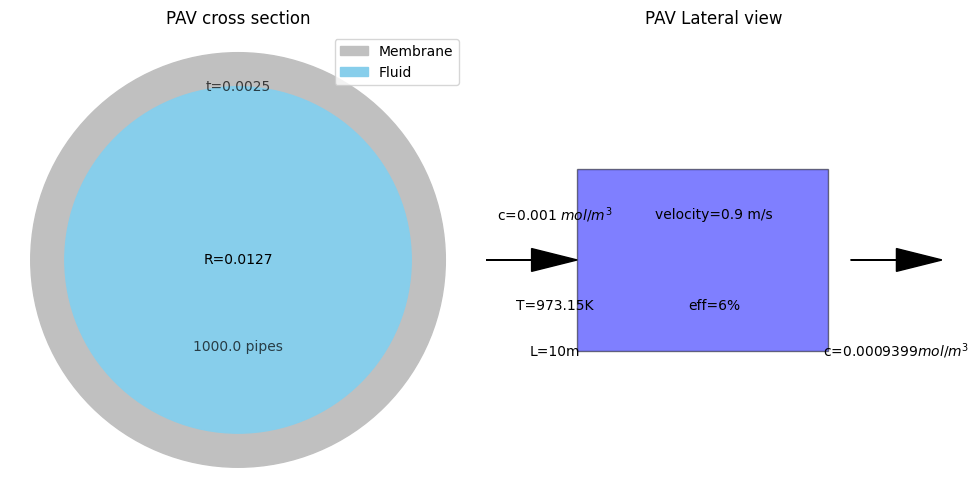

In [7]:
PAV.inspect()
fig=PAV.plot_component()
fig.show()

Extracted the 94.30489480783676% of the Tritium
Extracted the 5.695105192163238% of the Tritium


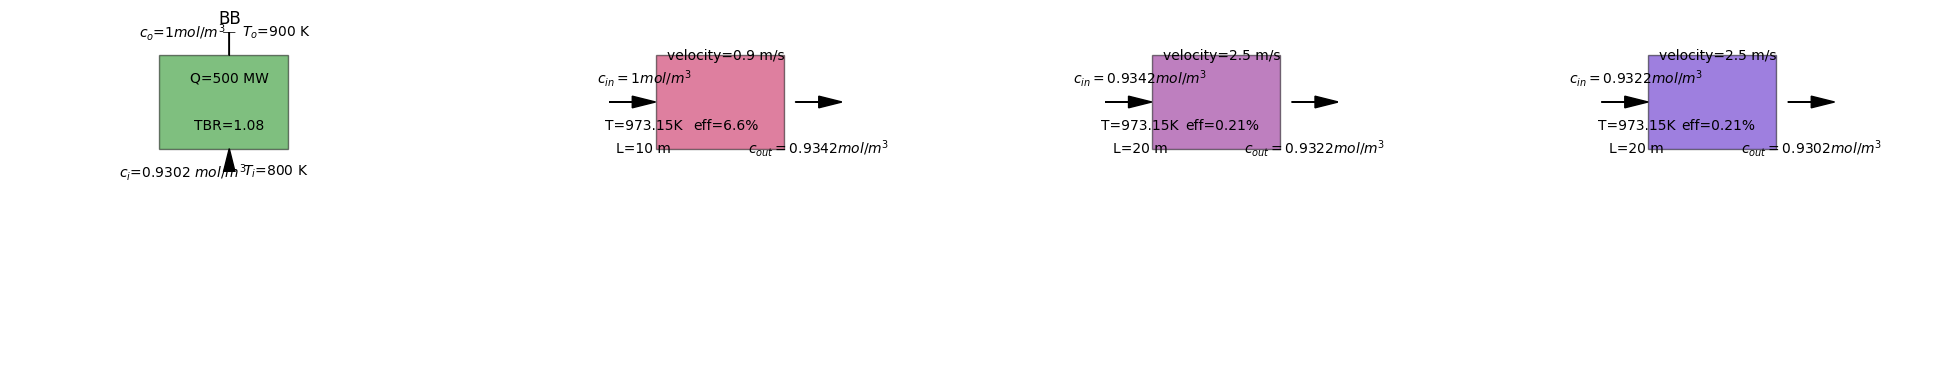

In [8]:
PAV.membrane.D=PAV.membrane.D*1E3
PAV.fluid.k_t=3.91E-5 ## COMSOL
PAV.fluid.D=PAV.fluid.D*1E2
Connection = Component(c_in=c_in, geometry=connection_geom,fluid=flibe, membrane=Steel, name='PAV2',loss=True) 
Connection2 = Component(c_in=c_in, geometry=connection_geom,fluid=flibe, membrane=Steel, name='PAV3',loss=True) 
BB=BreedingBlanket(Q=0.5E9,TBR=1.08,T_out=900,T_in=800,fluid=flibe, c_in=1,name="BB" )
BB.get_flowrate()
Circuit1=Circuit(components=[BB,PAV,Connection,Connection2],closed=False)
Circuit1.solve_circuit()
# Circuit.inspect_circuit()
Circuit1.get_gains_and_losses()
print("Extracted the "+str(Circuit1.extraction_perc*100) +"% of the Tritium")
print("Extracted the "+str(Circuit1.loss_perc*100) +"% of the Tritium")
fig2=Circuit1.plot_circuit()


In [9]:
Circuit1.get_circuit_pumping_power()
print("The circuit requires "+str(Circuit1.pumping_power/1E3)+" kW of pumping power")

The circuit requires 316.84572652449725 kW of pumping power


In [10]:
Connection.inspect()    

c_in: 0.9341808051251493
geometry is a <class 'TRIOMA.tools.component_tools.Geometry'> class, printing its variables:
    L: 20
    D: 0.0254
    thick: 0.0025
    n_pipes: 1000.0
    turbulator: None
eff: 0.0021381051764116643
n_pipes: (1000.0,)
fluid is a <class 'TRIOMA.tools.component_tools.Fluid'> class, printing its variables:
    T: 973.15
    MS: True
    D: 5.176263854774369e-09
    Solubility: 0.000454
    k_t: 0.00016239397747749114
    d_Hyd: 0.0254
    mu: 0.005498297045533315
    rho: 1938.1028000000001
    recirculation: 0
    U0: 2.5
    k: 1.1
    cp: 2386
    h_coeff: None
    inv: None
membrane is a <class 'TRIOMA.tools.component_tools.Membrane'> class, printing its variables:
    T: 973.15
    D: 1.604499778787223e-10
    K_S: 1
    thick: 0.0025
    k_d: 1000000000.0
    k_r: 1000000000.0
    k: None
    D_0: None
    E_d: None
    inv: None
name: PAV2
loss: True
inv: None
p_out: 1e-15
delta_p: 123205.36182569682
pumping_power: 156072.69575498477
U: None
tau: 0.2045

In [12]:
import math
import numpy as np

t_final=2E3
dt=1
t=0
compute_inv=True
rewrite_file=False
delay_PAV=(PAV.geometry.L/PAV.fluid.U0)
delay_connection=(Connection.geometry.L/Connection.fluid.U0)
delay_connection+=delay_PAV
delay_connection2=(Connection2.geometry.L/Connection2.fluid.U0)
delay_connection2+=delay_connection
delay_BB=0
i=0
N=math.ceil(delay_connection2/dt)
initial_value=1E-11
PAV_outlet_c= np.full(N, initial_value)
BB_outlet_c= np.full(N, initial_value)
PAV_eff=np.full(N, initial_value)
BB_Q= np.full(N, initial_value)
BB_inlet_c= np.full(N, initial_value)
outlet_connection1= np.full(N, initial_value)
outlet_connection2= np.full(N, initial_value)
PAV_inv=np.full(N, initial_value)
connection_inv=np.full(N, initial_value)
connection2_inv=np.full(N, initial_value)
def lin_ramp_pulse(t):
    t_ramp=1E1
    t_pulse=5E2
    t_down=1E2
    t_period=2*t_ramp+t_pulse+t_down
    if t%t_period<t_ramp:
        return (t%t_period)/t_ramp
    elif t%t_period<t_ramp+t_pulse:
        return 1
    elif t%t_period<2*t_ramp+t_pulse:
        return 1-((t%t_period-(t_ramp+t_pulse))/t_ramp)
    else:
        return 0
i=N
delay_ind_PAV=math.ceil(delay_PAV/dt)
delay_ind_connection=math.ceil(delay_connection/dt)
delay_ind_connection2=math.ceil(delay_connection2/dt)

while t<t_final:
    BB.Q=0.5E9*lin_ramp_pulse(t)
    BB.get_cout()
    PAV.c_in=BB.c_out
    Connection.c_in=PAV_outlet_c[i-delay_ind_PAV]
    Connection2.c_in=outlet_connection1[i-delay_ind_connection]
    BB.c_in=outlet_connection2[i-delay_ind_connection2]
    Circuit1.solve_circuit()
    PAV_outlet_c=np.append(PAV_outlet_c,PAV.c_out)
    BB_outlet_c=np.append(BB_outlet_c,BB.c_out)
    outlet_connection1=np.append(outlet_connection1,Connection.c_out)
    outlet_connection2=np.append(outlet_connection2,Connection2.c_out)
    BB_inlet_c=np.append(BB_inlet_c,BB.c_in)
    BB_Q=np.append(BB_Q,BB.Q)
    PAV_eff=np.append(PAV_eff,PAV.eff)
    if compute_inv:
        PAV.get_solid_inventory(flag_an=False)
        Connection.get_solid_inventory(flag_an=False)
        PAV_inv=np.append(PAV_inv,PAV.membrane.inv/PAV.geometry.n_pipes)
        connection_inv=np.append(connection_inv,Connection.membrane.inv/Connection.geometry.n_pipes)
    i+=1
    t+=dt
    


negative wall conc! = -8.818341490458424e-15
negative wall conc! = -8.818341490458424e-15
negative wall conc! = -8.818341490458424e-15
negative wall conc! = -8.818341490458424e-15
negative wall conc! = -8.818341490458424e-15
negative wall conc! = -8.818341490458424e-15
negative wall conc! = -8.818341490458424e-15
negative wall conc! = -8.818341490458424e-15
negative wall conc! = -8.818341490458424e-15
negative wall conc! = -8.818341490458424e-15
negative wall conc! = -8.818341490458424e-15
negative wall conc! = -8.818341490458424e-15
negative wall conc! = -8.818341490458424e-15
negative wall conc! = -8.818341490458424e-15
negative wall conc! = -8.818341490458424e-15
negative wall conc! = -8.818341490458424e-15
negative wall conc! = -8.818341490458424e-15
negative wall conc! = -8.818341490458424e-15
negative wall conc! = -8.818341490458424e-15
negative wall conc! = -8.818341490458424e-15
negative wall conc! = -8.818341490458424e-15
negative wall conc! = -4.551733028204628e-14
negative w

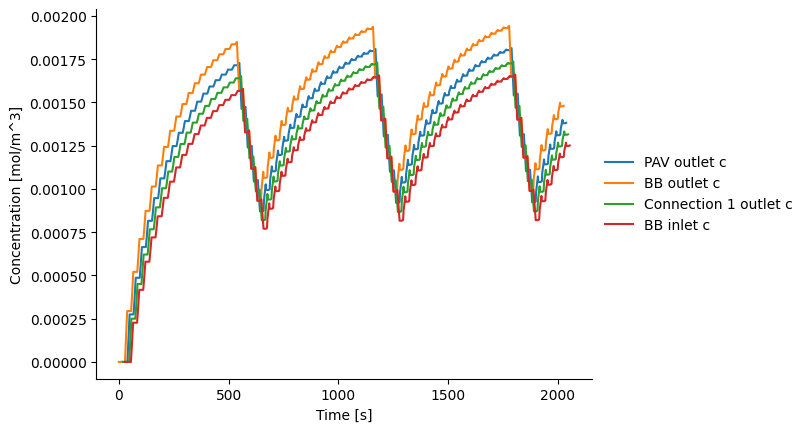

In [13]:
import matplotlib.pyplot as plt
t_final=t_final+delay_connection2
t_vec=np.arange(0,t_final,dt)
t_vec=t_vec
if len(t_vec)!=len(PAV_outlet_c):
    t_vec=np.append(t_vec,t_final+dt)
plt.plot(t_vec+delay_PAV,PAV_outlet_c,label="PAV outlet c")
plt.plot(t_vec,BB_outlet_c,label="BB outlet c")
plt.plot(t_vec+delay_connection,outlet_connection1,label="Connection 1 outlet c")
# plt.plot(t_vec+delay_ind_connection2,outlet_connection2,label="Connection 2 outlet c")
plt.plot(t_vec+delay_connection2,BB_inlet_c,label="BB inlet c")
# plt.yscale("log")
#put the legend outside the plot
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),frameon=False)
plt.xlabel("Time [s]")
plt.ylabel("Concentration [mol/m^3]")
## remove right and top spines
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)



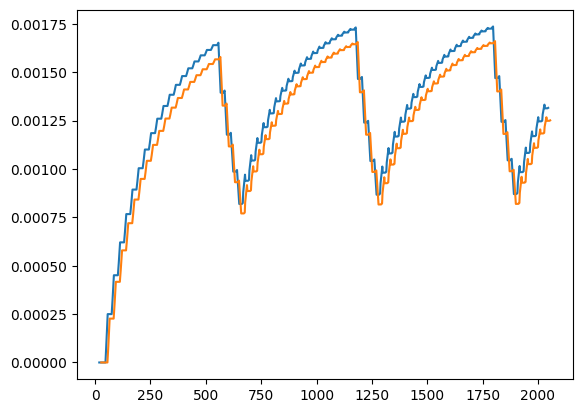

In [14]:
plt.plot(t_vec+delay_connection,outlet_connection1,label="Connection 1 outlet c")
plt.plot(t_vec+delay_ind_connection2,outlet_connection2,label="Connection 2 outlet c")

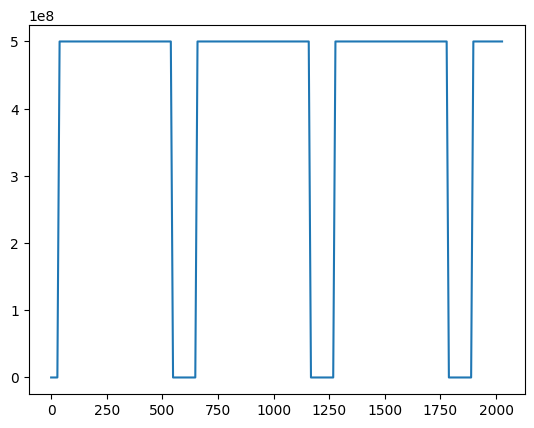

In [15]:
plt.plot(t_vec,BB_Q,label="BB Q")
plt.show()


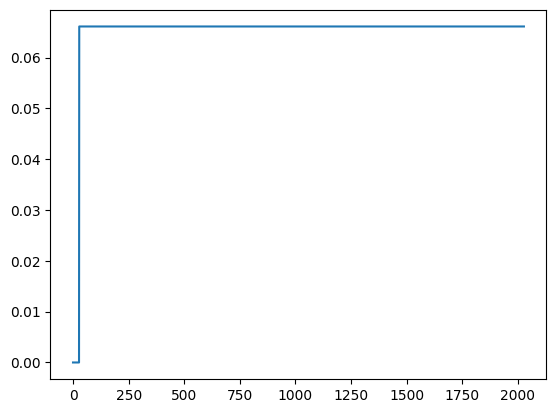

In [17]:
plt.plot(t_vec,PAV_eff,label="PAV eff")
# plt.ylim(0.10578,0.105781)

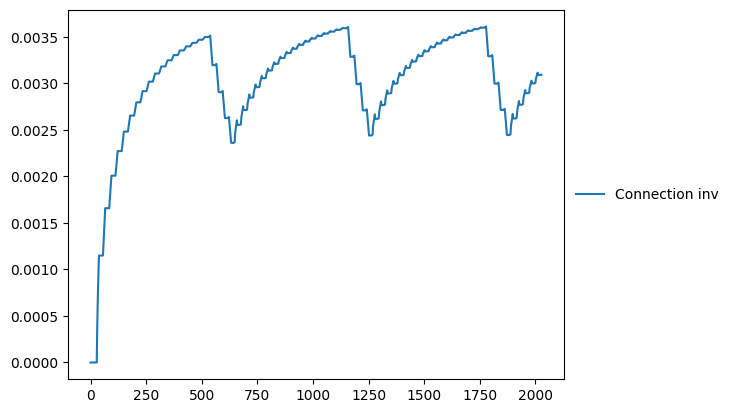

In [18]:
if compute_inv:    
    # plt.plot(t_vec,PAV_inv,label="PAV inv")
    plt.plot(t_vec,connection_inv,label="Connection inv")
    # plt.plot(t_vec,connection2_inv,label="Connection2 inv")
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),frameon=False)
    

In [19]:
folder="COMSOL_comparison_transient"
## Save vectors as txt file in the folder
exp_c_in_PAV=np.column_stack((t_vec,BB_outlet_c))
if rewrite_file:
    np.savetxt(folder+"/c_in_PAV_vec.txt",exp_c_in_PAV)
exp_c_out_PAV=np.column_stack((t_vec,PAV_outlet_c))
if rewrite_file:
    np.savetxt(folder+"/c_out_PAV_vec.txt",exp_c_out_PAV)


(0.0, 2000.0)

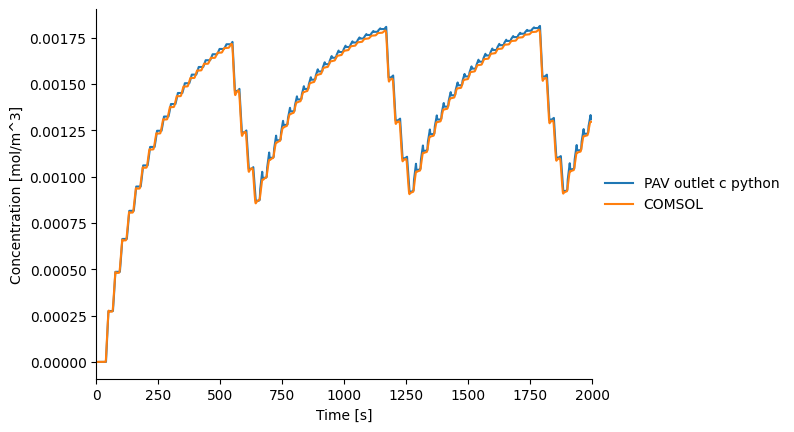

In [20]:
plt.plot(t_vec+delay_PAV,PAV_outlet_c,label="PAV outlet c python")
PAV_cout_coms=np.loadtxt(folder+"/c_out_PAV_vec_COMS.txt", delimiter="\t")
plt.plot(PAV_cout_coms[:,0],PAV_cout_coms[:,1],label="COMSOL")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),frameon=False)
## remove right and top spines
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.xlabel("Time [s]")
plt.ylabel("Concentration [mol/m^3]")
plt.xlim(0,2000)


Text(0, 0.5, 'Concentration [mol/m^3]')

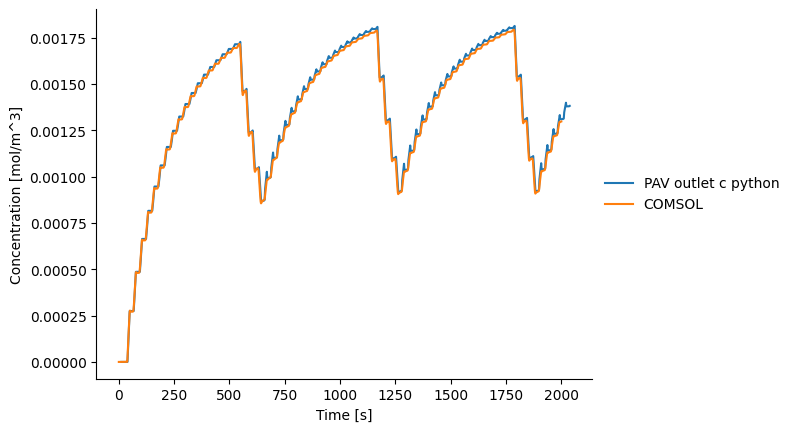

In [22]:
plt.plot(t_vec+delay_PAV,PAV_outlet_c,label="PAV outlet c python")
PAV_cout_coms=np.loadtxt(folder+"/c_out_PAV_vec_COMS.txt", delimiter="\t")
plt.plot(PAV_cout_coms[:,0],PAV_cout_coms[:,1],label="COMSOL")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),frameon=False)
# plt.xlim(0,1000)
# plt.ylim(0.0007,0.0008)
## remove right and top spines
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.xlabel("Time [s]")
plt.ylabel("Concentration [mol/m^3]")

Text(0, 0.5, 'Concentration [mol/m^3]')

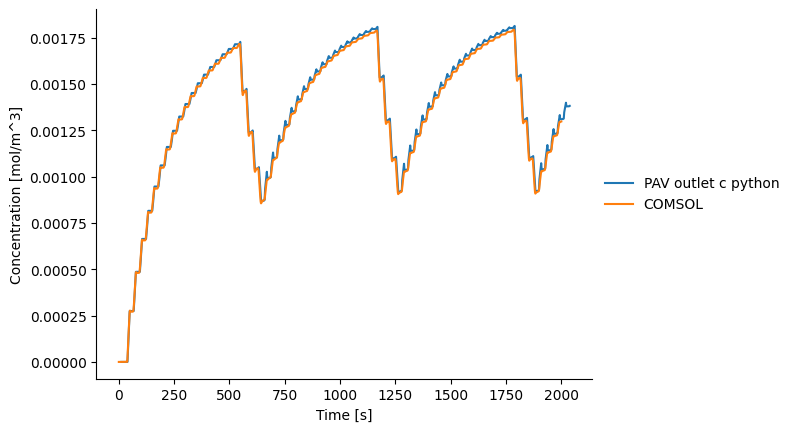

In [24]:
plt.plot(t_vec+delay_PAV,PAV_outlet_c,label="PAV outlet c python")
PAV_cout_coms=np.loadtxt(folder+"/c_out_PAV_vec_COMS.txt", delimiter="\t")
plt.plot(PAV_cout_coms[:,0],PAV_cout_coms[:,1],label="COMSOL")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),frameon=False)
# plt.xlim(0,1000)
# plt.ylim(0.00011,0.00012)
## remove right and top spines
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.xlabel("Time [s]")
plt.ylabel("Concentration [mol/m^3]")


(0.0, 0.5555555555555556)

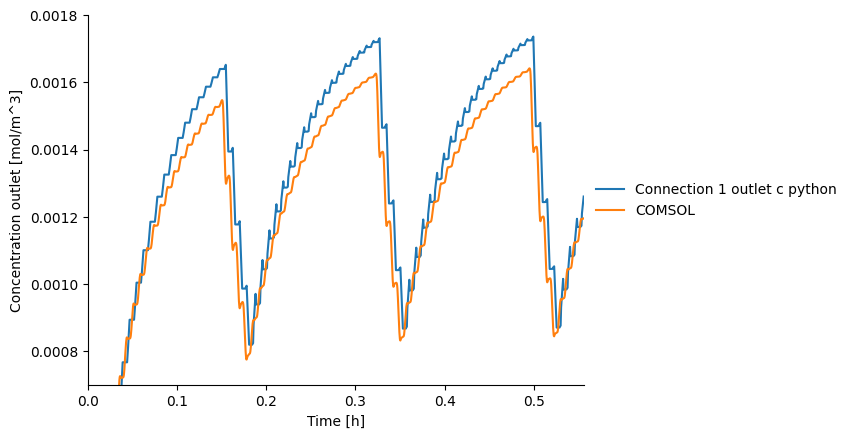

In [29]:
plt.plot((t_vec+delay_connection)/3600,outlet_connection1,label="Connection 1 outlet c python")
C1_cout_coms=np.loadtxt(folder+"/c_out_C1_vec_COMS_long.txt", delimiter="\t")
plt.plot(C1_cout_coms[:,0]/3600,C1_cout_coms[:,1],label="COMSOL")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),frameon=False)
# plt.xlim(0,20000)
plt.ylim(0.7E-3,1.8E-3)
plt.xlabel("Time [h]")
plt.ylabel("Concentration outlet [mol/m^3]")
## remove right and top spines
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.xlim(0,2000/3600)

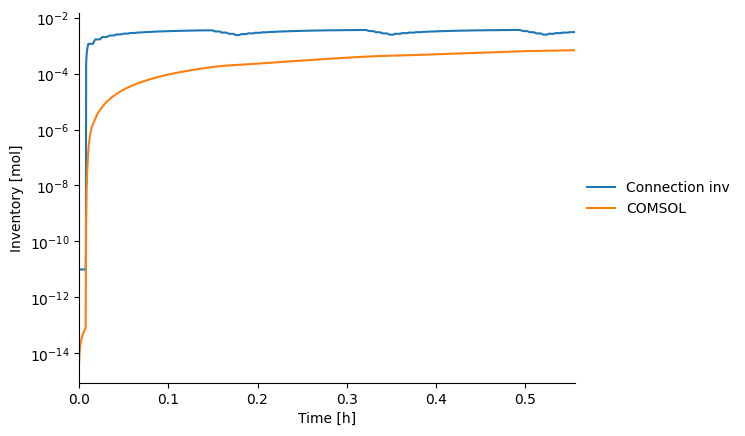

In [31]:
if compute_inv:    
    plt.plot(t_vec/3600,connection_inv,label="Connection inv")
    
    C1_inv_coms=np.loadtxt(folder+"/Inv_c1_vec_COMS_long.txt", delimiter="\t")
    plt.plot(C1_inv_coms[:,0],C1_inv_coms[:,1],label="COMSOL")
    # plt.yscale("log")
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),frameon=False)
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['top'].set_visible(False)
    plt.xlabel("Time [h]")
    plt.ylabel("Inventory [mol]")
    plt.yscale("log")
    plt.xlim(0,2000/3600)
    

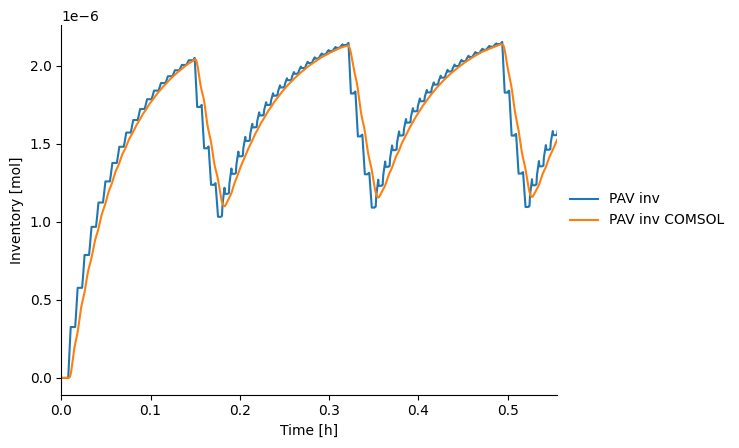

In [32]:
if compute_inv:    
    plt.plot(t_vec/3600,PAV_inv,label="PAV inv")
    
    PAV_inv_coms=np.loadtxt(folder+"/Inv_PAV_vec_COMS_long.txt", delimiter="\t")
    plt.plot(PAV_inv_coms[:,0]/3600,PAV_inv_coms[:,1],label="PAV inv COMSOL")
    # plt.yscale("log")
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),frameon=False)
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['top'].set_visible(False)
    plt.xlabel("Time [h]")
    plt.ylabel("Inventory [mol]")
    plt.xlim(0,2000/3600)

(0.0028284667012017086, 0.003457014857024311)

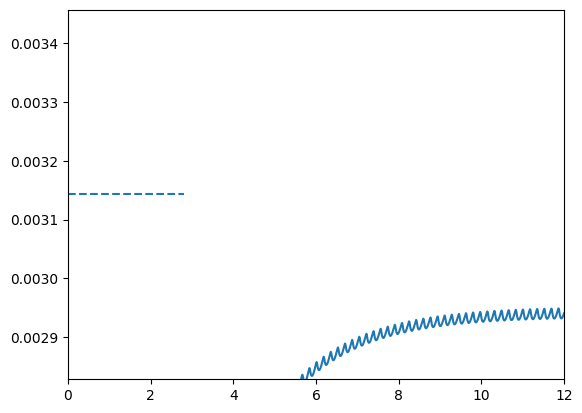

In [33]:
## get the maximum and minimum of the last 1000 values of COMS_vec
from numpy import average
t_ramp=1E1
t_pulse=5E2
t_down=1E2
t_period=2*t_ramp+t_pulse+t_down
ind_period=math.ceil(t_period/dt)
# max_coms=np.max(C1_cout_coms[-1000:,1])
# min_coms=np.min(C1_cout_coms[-1000:,1])
average_coms=(outlet_connection1[-ind_period:].mean())
Connection.c_in=average_coms
Connection.get_solid_inventory()
plt.plot(C1_inv_coms[:,0],C1_inv_coms[:,1],label="Connection inv")
ave_inv_py=Connection.membrane.inv/Connection.geometry.n_pipes
plt.hlines(ave_inv_py,0,t_final*5/3600,label="python on COMSOL average",linestyles='dashed')
plt.xlim(0,12)
plt.ylim(0.9*ave_inv_py,1.1*ave_inv_py)